<a href="https://colab.research.google.com/github/appodsvirov/3D_ML_opencv/blob/main/3D_ML_mesh_to_other.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Дз №1 на по 3D ML  
1) Берем одну  3D mesh-модель(объект) сложной формы. Пример: человек, единорог — норм. Айфон — не норм  
2) Трансфигурировать модель из mesh в разные формы данны: воксельный, облако точек, функциональная, 2.5D карта глубины
используя библиотеку trimesh

In [1]:
!pip install trimesh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 688.9/688.9 kB 6.3 MB/s eta 0:00:00


In [2]:
import trimesh
import trimesh.points
import numpy as np
import matplotlib.pyplot as plt

In [5]:
model_path = '/content/cat.obj'

In [6]:
def as_mesh(scene_or_mesh): #функция, которая переводит из сцены в меш
    if isinstance(scene_or_mesh, trimesh.Scene):
        mesh = trimesh.util.concatenate([
            trimesh.Trimesh(vertices=m.vertices, faces=m.faces)
            for m in scene_or_mesh.geometry.values()])
    else:
        mesh = scene_or_mesh
    return mesh

In [7]:
# Загрузка модели
mesh = as_mesh(trimesh.load(model_path))
mesh.show()

## Воксельный

In [13]:
voxel = mesh.voxelized(0.5)
voxel.show()

##Облако точек

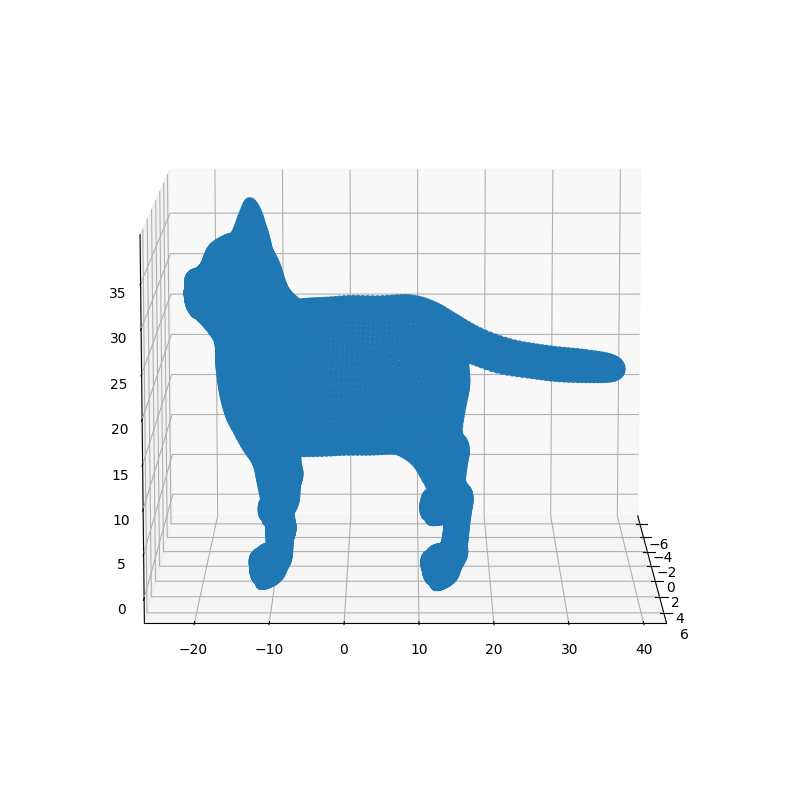

In [12]:
def point_show(pounts_cloud, al = 0, bl = 0):
  fig = plt.figure(figsize=(10, 10))
  ax = plt.axes(projection='3d');
  x,y,z = pounts_cloud[:,0], pounts_cloud[:,1], pounts_cloud[:,2]
  ax.scatter3D(x, y, z);
  ax.view_init(al, bl)
  plt.show()

point_show(mesh.vertices, 10, 0)
#point_show(trimesh.convex.hull_points(mesh), 45, 45)

## Функциональная -- функции с mesh_to_sdf выдают ошибку
NoSuchDisplayException: Cannot connect to "None"

In [18]:
!pip install scikit-learn
!pip install git+https://github.com/marian42/mesh_to_sdf

  Cloning https://github.com/marian42/mesh_to_sdf to /tmp/pip-req-build-1y9303p2
  Running command git clone --filter=blob:none --quiet https://github.com/marian42/mesh_to_sdf /tmp/pip-req-build-1y9303p2
  Resolved https://github.com/marian42/mesh_to_sdf to commit 66036a747e82e7129f6afc74c5325d676a322114
  Preparing metadata (setup.py) ... done
  Using cached pyrender-0.1.45-py3-none-any.whl (1.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 858.3/858.3 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mesh-to-sdf: filename=mesh_to_sdf-0.0.14-py3-none-any.whl size=14485 sha256=ff4416d4b0c55118d13fdb4f1d278a42299e57476fecb5cb26b0f9b2666c0f64
  Stored in directory: /tmp/pip-ephem-wheel-cache-wlrmobya/wheels/07/f1/7e/34ef42d1ac0c06e3ada1a1a35deaea1846d6e3117a16aae320
  Created wheel for pyopengl

In [30]:
!pip install mesh_to_sdf

In [31]:
import os
import sys
import torch
need_pytorch3d=False
try:
    import pytorch3d
except ModuleNotFoundError:
    need_pytorch3d=True
if need_pytorch3d:
    if torch.__version__.startswith("2.1.") and sys.platform.startswith("linux"):
        # We try to install PyTorch3D via a released wheel.
        pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
        version_str="".join([
            f"py3{sys.version_info.minor}_cu",
            torch.version.cuda.replace(".",""),
            f"_pyt{pyt_version_str}"
        ])
        !pip install fvcore iopath
        !pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html
    else:
        # We try to install PyTorch3D from source.
        !pip install 'git+https://github.com/facebookresearch/pytorch3d.git@stable'

In [32]:
from mesh_to_sdf import mesh_to_sdf, sample_sdf_near_surface
center_mass = mesh.center_mass
query_points = np.array([[center_mass],[[3,3,3]]])
for point in query_points:
    print(
        "SDF{0} = {1}".format(point[0] ,mesh_to_sdf(mesh,point)[0])
)

NoSuchDisplayException: ignored

In [23]:
import matplotlib.pyplot as plt
points, sdf = mesh_to_sdf.sample_sdf_near_surface(mesh, number_of_points=5000)
fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(111, projection="3d")
ax.view_init(elev=70, azim=-70)
ax.scatter(points[:, 0], points[:, 1], zs=-points[:, 2], c=sdf, cmap="hot_r")

NoSuchDisplayException: ignored

In [29]:
points, sdf = sample_sdf_near_surface(mesh, number_of_points=5000)
fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(111, projection="3d")
ax.view_init(elev=70, azim=-70)
ax.view_init(0, 0)
ax.scatter(points[:, 0], points[:, 1], zs=-points[:, 2], c=sdf, cmap="hot_r")

NoSuchDisplayException: ignored

##Карта глубины

In [37]:
from pytorch3d.renderer import (
    FoVPerspectiveCameras, look_at_view_transform,
    RasterizationSettings, BlendParams,
    MeshRenderer, MeshRasterizer, SoftPhongShader, SoftSilhouetteShader
)

from pytorch3d.io import load_obj
from pytorch3d.structures.meshes import Meshes
from pytorch3d.renderer.mesh.textures import TexturesAtlas
from torchvision import transforms

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Получение вершин, граней и вспомогательной информации
verts, faces, aux = load_obj(f='cat.obj',
                             device=device,
                             load_textures=True,
                             create_texture_atlas=True,
                             texture_atlas_size=4,
                             texture_wrap=None)

# Создайте объект текстуры
atlas = aux.texture_atlas

# Инициализируйте сетку с вершинами, гранями и текстурами.
# Создан объект Meshes
obj_mesh = Meshes(verts=[verts],
                  faces=[faces.verts_idx],
                  textures=TexturesAtlas(atlas=[atlas]), )


print('We have {0} vertices and {1} faces.'.format(verts.shape[0], faces.verts_idx.shape[0]))

# Инициализируйте камеру с указанием расстояния до камеры, угла возвышения и угла азимута.
camera_distance = 70
camera_elv_angle =-45
camera_azi_angle = 0

R, T = look_at_view_transform(dist=camera_distance, elev=camera_elv_angle, azim=camera_azi_angle )
cameras = FoVPerspectiveCameras(device=device, R=R, T=T)

# Here we set the output image to be of size 256 x 256
output_im_size = 512
raster_settings = RasterizationSettings(image_size=output_im_size, blur_radius=0.0, faces_per_pixel=1,)

We have 35290 vertices and 70576 faces.


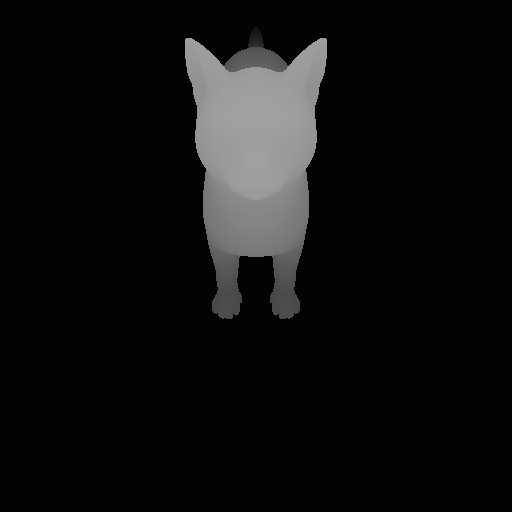

In [38]:
# Инициализируем растеризатор с помощью класса MeshRasterizer
rasterizer = MeshRasterizer(cameras=cameras, raster_settings=raster_settings)

# Текстурированный шейдер Фонга интерполирует UV-координаты текстуры для
# каждую вершину и образцы изображения текстуры.
shader = SoftPhongShader(device=device, cameras=cameras)

# Создайте средство рендеринга сетки, объединив растеризатор и шейдер.
renderer = MeshRenderer(rasterizer, shader)

# вывод изображения с камеры
image = renderer(obj_mesh)
camera_view = (image[..., :3].squeeze() * 255).byte().cpu().numpy()
transforms.ToPILImage()(camera_view)

# выходное изображение глубины
fragments = rasterizer(obj_mesh)
depth_map = (fragments.zbuf.squeeze() * -3).byte().cpu().numpy()
transforms.ToPILImage()(depth_map)